In [151]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex ,plot_state_qsphere


In [152]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.h(0)
circuit.measure(0, 0)
circuit.draw()


┌───┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0

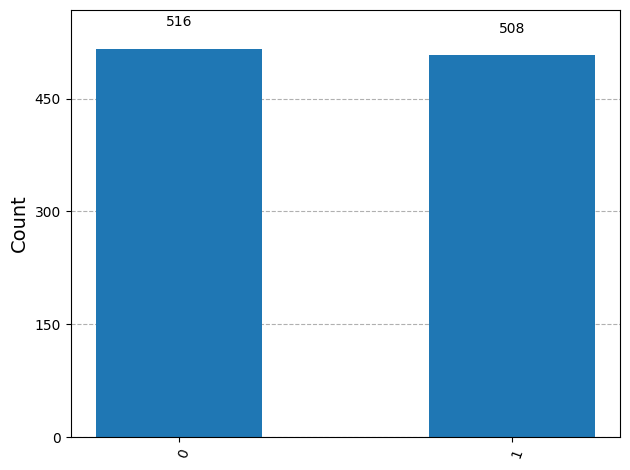

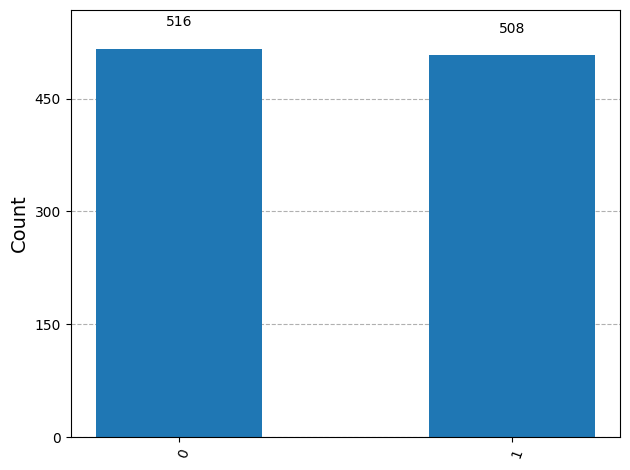

In [153]:
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
plot_histogram(result.get_counts())

In [154]:
circuit.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(circuit)
array_to_latex(statevector, prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

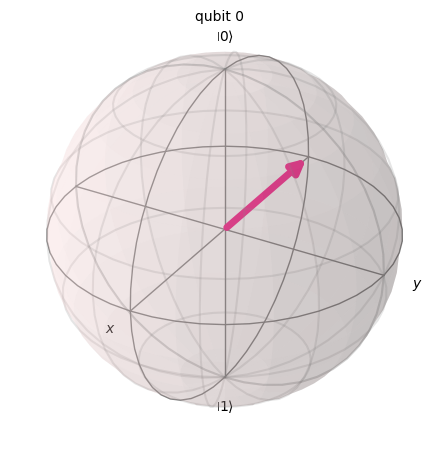

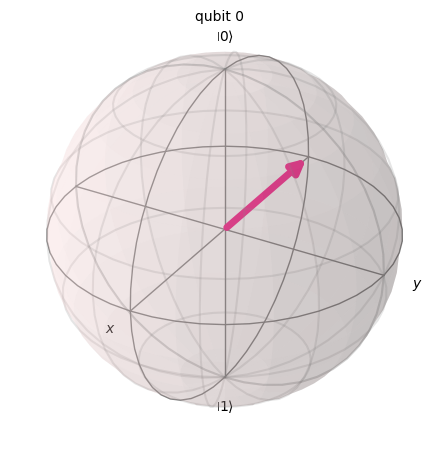

In [155]:
plot_bloch_multivector(statevector)

In [156]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.h(0)
circuit.h(0)
circuit.draw()

┌───┐┌───┐┌───┐
  q: ┤ X ├┤ H ├┤ H ├
     └───┘└───┘└───┘
c: 1/═══════════════

In [157]:
circuit.measure(0, 0)
circuit.draw()

┌───┐┌───┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤ H ├┤M├
     └───┘└───┘└───┘└╥┘
c: 1/════════════════╩═
                     0

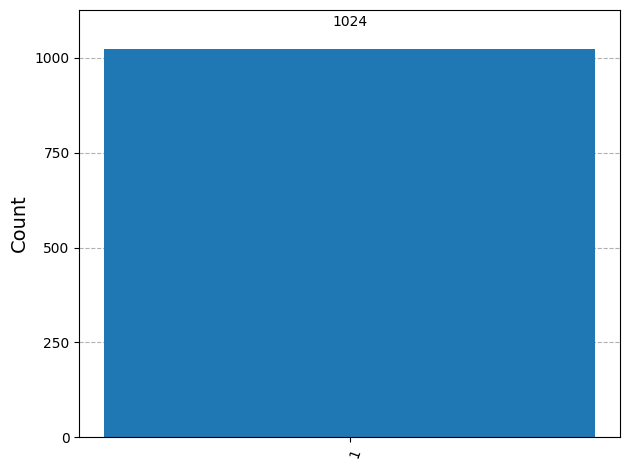

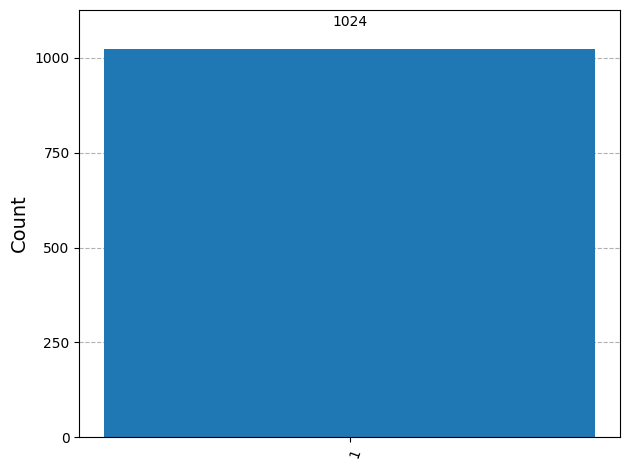

In [158]:
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
plot_histogram(result.get_counts())

In [159]:
circuit.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(circuit)
array_to_latex(statevector, prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

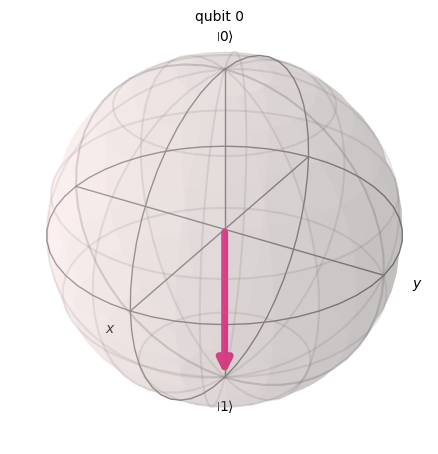

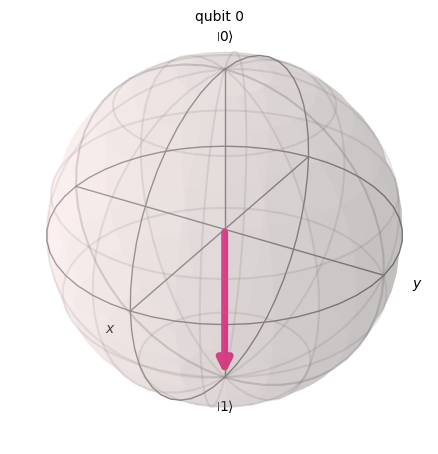

In [160]:
plot_bloch_multivector(statevector)

In [161]:
from qiskit.qasm2 import dumps, dump # use dumps for string, dump for file

qasm_str_v3 = dumps(circuit)
print(qasm_str_v3)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
x q[0];
h q[0];
h q[0];
